In [146]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
best = pd.read_csv('./submission/bomin.csv')
my = pd.read_csv('./submission/tta-28E-val0.9611-focal2-y90rotate-voxelnet.csv')


In [150]:
my[my['label'] == best['label']].shape[0] / len(my) 

0.761025

# Test 공간~.,~

In [435]:
import torch
a = torch.load('./ckpt/20E-val0.9475-randsample-jitter-scale-axis-voxelnet.pth')
a["optimizer_state_dict"]

{'state': {0: {'step': 14375,
   'exp_avg': tensor([[-8.0469e-03,  2.1064e-02,  6.7053e-04,  5.6052e-45, -3.9211e-03,
             1.1480e-03, -9.2957e-05],
           [ 2.7975e-02, -3.0204e-02,  5.0959e-02,  2.8026e-45, -4.3392e-04,
             3.4662e-03, -2.6928e-03],
           [-1.4436e-02, -1.1042e-02, -2.4558e-02,  4.2039e-45, -1.5535e-03,
             3.2976e-03, -3.5674e-04],
           [ 3.9612e-03,  1.6295e-02,  9.3980e-03,  2.8026e-45, -1.1282e-04,
             2.5799e-03, -6.4227e-04],
           [-6.4955e-03, -1.8636e-02,  6.6501e-03, -2.8026e-45,  6.2000e-03,
             1.7564e-03,  4.2134e-03],
           [-3.8734e-03, -1.6562e-02,  3.8414e-02,  2.8026e-45, -3.0469e-03,
            -1.0227e-03, -3.4807e-03],
           [-6.1952e-03, -6.6652e-03, -1.1243e-03, -4.2039e-45, -2.2966e-03,
             1.0936e-03,  5.1782e-03],
           [ 1.2312e-03,  9.7252e-03, -7.2366e-03,  2.8026e-45,  1.5284e-03,
            -2.8402e-04,  3.3811e-04],
           [-1.5118e-01,  9.166

In [52]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['1']

display(np.array(points))
points += np.random.uniform(0, 0.02, size=points.shape)
display(points)

array([[ 0.15      ,  0.02270992,  0.52146947],
       [ 0.15      ,  0.03520992,  0.52146947],
       [ 0.15      ,  0.04770992,  0.52146947],
       ...,
       [ 0.15      , -0.02729008, -0.45353053],
       [ 0.15      , -0.02729008, -0.46603053],
       [ 0.15      , -0.02729008, -0.47853053]])

array([[ 0.16899407,  0.04057691,  0.5222015 ],
       [ 0.1611582 ,  0.03788077,  0.52464026],
       [ 0.15300149,  0.05878495,  0.53850716],
       ...,
       [ 0.15501116, -0.00905589, -0.43970114],
       [ 0.16363132, -0.01251821, -0.46569034],
       [ 0.1644186 , -0.02103537, -0.47354655]])

In [89]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['1']
reduce_rate = 0.3
print(int(points.shape[0] * reduce_rate))
a = np.sort(np.random.choice(points.shape[0], int(points.shape[0] * reduce_rate) , replace=False))
print(a)
points = points[a, : ]
points.shape

7860
[    1     6    17 ... 26185 26198 26199]


(7860, 3)

In [124]:
_p = np.random.uniform(0, 1)
_p

0.5390863113008126

In [436]:
import torch



optimizer = torch.optim.Adam(params = [torch.tensor(1)], lr = 1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 
                                                      T_max=10,
                                                      eta_min=1e-4)
# s2 = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                         lr_lambda=lambda epoch: 0.95 ** epoch,
#                                         last_epoch=-1,
#                                         verbose=False)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
epoch = 40
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: 0.95 ** epoch)
optimizer.param_groups[0]['lr'] = 1e-5
lrs = []
for _ in range(epoch):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()


In [434]:
optimizer.param_groups

[{'params': [tensor(1)],
  'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'initial_lr': 0.0001}]

In [432]:
lrs

[1e-05,
 9.5e-05,
 9.025e-05,
 8.573749999999999e-05,
 8.1450625e-05,
 7.737809374999998e-05,
 7.350918906249998e-05,
 6.983372960937497e-05,
 6.634204312890623e-05,
 6.30249409724609e-05,
 5.987369392383787e-05,
 5.688000922764597e-05,
 5.403600876626367e-05,
 5.1334208327950485e-05,
 4.876749791155295e-05,
 4.6329123015975305e-05,
 4.4012666865176535e-05,
 4.181203352191771e-05,
 3.972143184582182e-05,
 3.7735360253530726e-05,
 3.584859224085419e-05,
 3.405616262881148e-05,
 3.2353354497370904e-05,
 3.073568677250236e-05,
 2.919890243387724e-05,
 2.7738957312183377e-05,
 2.6352009446574204e-05,
 2.5034408974245492e-05,
 2.3782688525533216e-05,
 2.2593554099256555e-05,
 2.146387639429373e-05,
 2.039068257457904e-05,
 1.9371148445850086e-05,
 1.8402591023557583e-05,
 1.74824614723797e-05,
 1.6608338398760718e-05,
 1.577792147882268e-05,
 1.4989025404881546e-05,
 1.4239574134637468e-05,
 1.3527595427905592e-05]

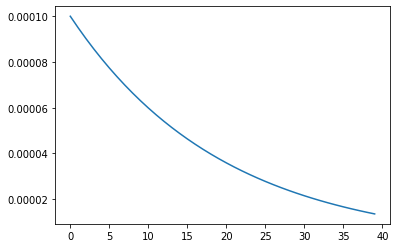

In [425]:
plt.plot([i for i in range(epoch)], lrs)

# Norm point visualize

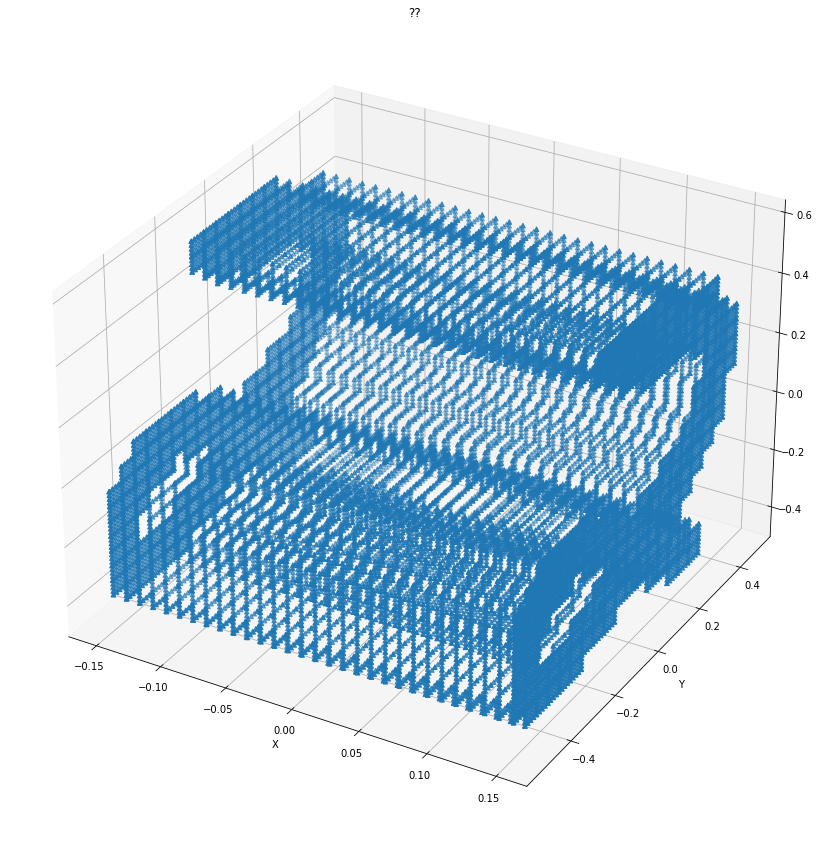

In [236]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['12823']
p = np.array(points)

train_range = np.array([(-0.1579, 0.1579), (-0.7023, 0.6843), (-0.6795, 0.6597)])
test_range = np.array([(-0.7839, 0.7732), (-0.7591, 0.7707), (-0.7849, 0.7697)])

x_range = np.random.uniform

f, axs = plt.subplots(1,1, figsize=(15, 15), subplot_kw={"projection":'3d'})
# axs = axs.flatten()
x = p[:,0]
y = p[:,1]
z = p[:,2]

axs.scatter(x,y,z, marker='^', cmap="inferno")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("??")
axs.view_init(elev=30.)

# Grid_cutout

(22750, 3)
0.004506587982177734
(15525, 3)


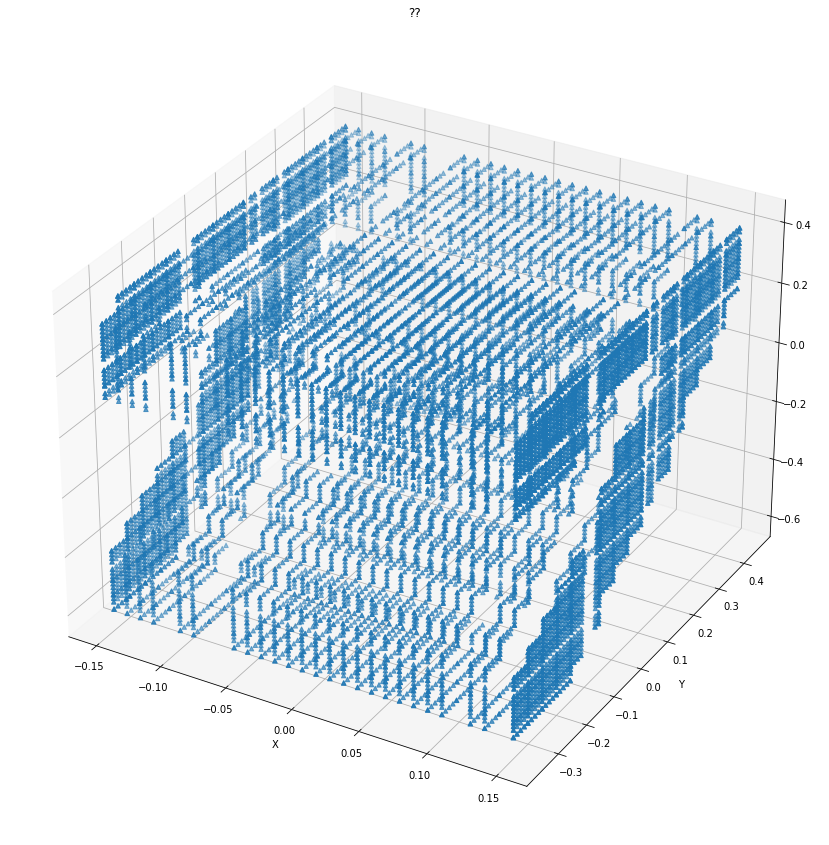

In [813]:
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['683']
p = np.array(points)
print(p.shape)
def grid_cutout(points, num_drop=12) :
    
    xyzmax = np.max(points, 0)
    xyzmin = np.min(points, 0)

    r, s = np.linspace(xyzmin[:], xyzmax[:], num=64, endpoint=False, retstep=True)

    x_pick = np.sort(np.random.choice(r[:, 0], num_drop))
    y_pick = np.sort(np.random.choice(r[:, 1], num_drop))
    z_pick = np.sort(np.random.choice(r[:, 2], num_drop))

    for idx, pick in enumerate([x_pick, y_pick, z_pick]) :
        cut_list = []
        for i in range(num_drop):
            r = np.where(((pick[i]< points) & (points < pick[i] + s[idx])))[0]
            if r.shape[0] != 0 :
                cut_list.append(r)

        cut_list = np.unique(np.concatenate(cut_list))

        diff_point = np.setdiff1d(np.arange(points.shape[0]), cut_list)
        points = points[diff_point, :] 
    return points

from time import time
s = time()
p = grid_cutout(p, num_drop=5)
print(time()- s)
print(p.shape)
f, axs = plt.subplots(1,1, figsize=(15, 15), subplot_kw={"projection":'3d'})
# axs = axs.flatten()
x = p[:,0]
y = p[:,1]
z = p[:,2]

axs.scatter(x,y,z, marker='^', cmap="inferno")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("??")
axs.view_init(elev=30.)

# data augmentation visualization

(11850, 3)
(7939, 3)


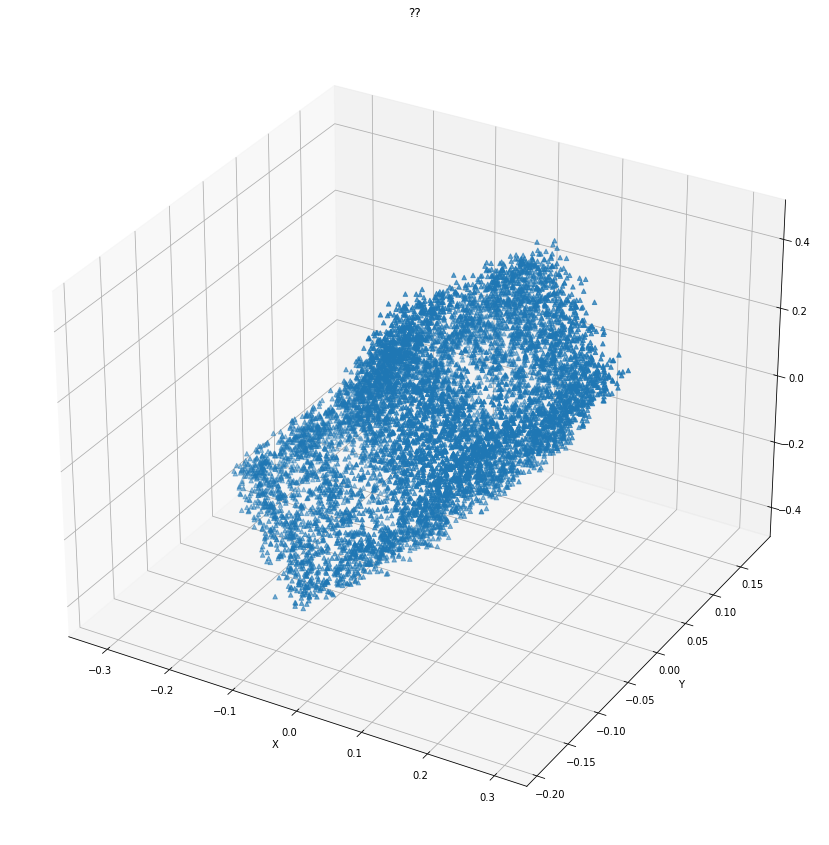

In [1081]:
def rand_rotation(x_degree, y_degree, z_degree, point, p=0.5) :
    _p = np.random.uniform(0, 1)
    if _p < p :
        return rotation(x_degree, y_degree, z_degree, point)

    else :
        return point

def rotation(a, b, c, dots):
    mx = np.array([[1, 0, 0], [0, np.cos(a), -np.sin(a)], [0, np.sin(a), np.cos(a)]])
    my = np.array([[np.cos(b), 0, np.sin(b)], [0, 1, 0], [-np.sin(b), 0, np.cos(b)]])
    mz = np.array([[np.cos(c), -np.sin(c), 0], [np.sin(c), np.cos(c), 0], [0, 0, 1]])
    m = np.dot(np.dot(mx,my),mz)
    dots = np.dot(dots, m.T)
    return dots

def jittering(point, scale_range) :
    point += np.random.uniform(*scale_range, size=point.shape) 
    return point

def scaling(point, scale_range) :
    point *= np.random.uniform(*scale_range)
    return point

def rand_sampling(point) :
    point_num = point.shape[0]

    if point_num >= 20000 :
        sampling_rate=0.8
    else :
        sampling_rate=0.9

    sampling_idx = np.sort(np.random.choice(point_num, int(point_num * sampling_rate) , replace=False))
    point = point[sampling_idx, :]
    return point

def rand_degree(*rotation_range) :
    assert len([rotation_range]) != 2, 'expected 2 parameters, but given more or less'
    return np.random.uniform(*rotation_range)

def trans_axis_range(point, axis=[0]) :
    # Transform train point range to test point range
    point[:, axis] = point[:, axis] / (np.max(np.abs(train_range[axis])) + 0.1) * (np.min(np.abs(test_range[axis])) - 0.1)
    return point

def grid_cutout(points, low=5, high=10) :
    num_drop = np.random.randint(low, high)
    xyzmax = np.max(points, 0)
    xyzmin = np.min(points, 0)

    r, s = np.linspace(xyzmin[:], xyzmax[:], num=64, endpoint=False, retstep=True)

    x_pick = np.sort(np.random.choice(r[:, 0], num_drop))
    y_pick = np.sort(np.random.choice(r[:, 1], num_drop))
    z_pick = np.sort(np.random.choice(r[:, 2], num_drop))

    for idx, pick in enumerate([x_pick, y_pick, z_pick]) :
        cut_list = []
        for i in range(num_drop):
            r = np.where(((pick[i]< points) & (points < pick[i] + s[idx])))[0]
            if r.shape[0] != 0 :
                cut_list.append(r)

        cut_list = np.unique(np.concatenate(cut_list))

        diff_point = np.setdiff1d(np.arange(points.shape[0]), cut_list)
        points = points[diff_point, :] 
    return points


train_range = np.array([(-0.1579, 0.1579), (-0.7023, 0.6843), (-0.6795, 0.6597)])
test_range = np.array([(-0.7839, 0.7732), (-0.7591, 0.7707), (-0.7849, 0.7697)])
all_points = h5py.File('./data/train.h5', 'r')
points = all_points['6683']
points = np.array(points)
print(points.shape)

points = rand_sampling(points)
points = grid_cutout(points, low=3, high=7)
points= trans_axis_range(points, axis=[0,1,2])
x_degree = rand_degree(-np.pi/4, np.pi/4)
y_degree = rand_degree(-np.pi/4, np.pi/4)
z_degree = rand_degree(-np.pi/6, np.pi/6)
points = rand_rotation(x_degree, y_degree, z_degree, points, p=0.80)
points = jittering(points, (-0.02, 0.02))
points = scaling(points, (0.98, 1.02))

print(points.shape)
f, axs = plt.subplots(1,1, figsize=(15, 15), subplot_kw={"projection":'3d'})
# axs = axs.flatten()
x = points[:,0]
y = points[:,1]
z = points[:,2]

axs.scatter(x,y,z, marker='^', cmap="inferno")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("??")
axs.view_init(elev=30.)

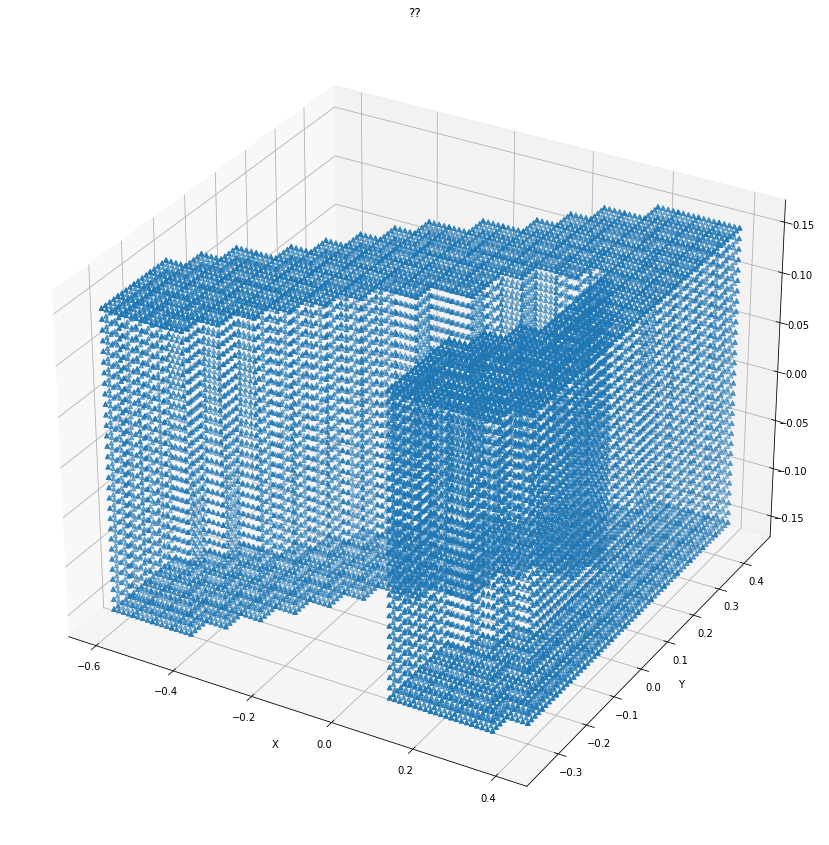

In [820]:
def rotation(a, b, c, dots):
    mx = np.array([[1, 0, 0], [0, np.cos(a), -np.sin(a)], [0, np.sin(a), np.cos(a)]])
    my = np.array([[np.cos(b), 0, np.sin(b)], [0, 1, 0], [-np.sin(b), 0, np.cos(b)]])
    mz = np.array([[np.cos(c), -np.sin(c), 0], [np.sin(c), np.cos(c), 0], [0, 0, 1]])
    m = np.dot(np.dot(mx,my),mz)
    dots = np.dot(dots, m.T)
    return dots 

all_points = h5py.File('./data/train.h5', 'r')
points = all_points['683']
p = np.array(points)

p = rotation(0, np.pi/2, 0, points)
f, axs = plt.subplots(1,1, figsize=(15, 15), subplot_kw={"projection":'3d'})
# axs = axs.flatten()
x = p[:,0]
y = p[:,1]
z = p[:,2]

axs.scatter(x,y,z, marker='^', cmap="inferno")
axs.set_xlabel("X")
axs.set_ylabel("Y")
axs.set_title("??")
axs.view_init(elev=30.)

In [1096]:
import torch.nn as nn
t = torch.tensor([2,3,1,0], dtype=torch.long)
i = torch.tensor([[-0.1, 0.8, 0.4, -0.5],
                 [-0.1, -0.8, 0.4, -0.5],
                 [0.1, 0.8, 0.4, -0.5],
                 [0.5, -0.8, -0.4, -0.5]], requires_grad=True)
ce = nn.CrossEntropyLoss()

los = ce(i, t)
print(los)

tensor(1.1504, grad_fn=<NllLossBackward0>)


In [1097]:
los.backward()

In [1098]:
los

tensor(1.1504, grad_fn=<NllLossBackward0>)

In [1099]:
i

tensor([[-0.1000,  0.8000,  0.4000, -0.5000],
        [-0.1000, -0.8000,  0.4000, -0.5000],
        [ 0.1000,  0.8000,  0.4000, -0.5000],
        [ 0.5000, -0.8000, -0.4000, -0.5000]], requires_grad=True)

In [1100]:
t

tensor([2, 3, 1, 0])

# Progressive Learning

In [1146]:
class aug_option() :
    def __init__(self) :
        # rand_rotation
        self.x_range = [-np.pi/4, np.pi/4]
        self.y_range = [-np.pi/4, np.pi/4]
        self.z_range = [-np.pi/6, np.pi/6]
        self.rotation_p = 0.8

        # cutout
        self.cutout_low = 3
        self.cutout_high = 7

        # rand sampling
        self.sampling_low = 0.95
        self.sampling_high = 0.8

        # jitter
        self.jitter_range = [-0.02, 0.02]

        # scaling
        self.scaling_range = [0.98, 1.02]

In [1108]:
class Augmentation() :
    def __init__(self, rand_rotation, step=10) :
        self.opt = aug_option()
        self.rand_rotation = rand_rotation
        self.step = step
        self.trans_axis_chk = True
        
        self.aug = [            
            self.grid_cutout,       
            self.rand_rotation,
            self.jittering,
            self.scaling
        ]
        
        self.aug_params= [
            [opt.cutout_low, opt.cutout_low],
            [opt.x_range, opt.y_range, opt.z_range, opt.rotation_p],
            [opt.jitter_range],
            [opt.scaling_range]
        ]
        
    def __call__(self, points, epoch, tta=False) :
        
        
        points = self.rand_sampling(points, opt.sampling_low, opt.sampling_high)
        
        if epoch < 10 :
            points= self.trans_axis_range(points, axis=[0,1,2])
            
        elif self.trans_axis_chk :
            self.aug.insert(1, self.trans_axis_range)
            self.aug_params.insert(1, [[0,1,2]])
            self.trans_axis_chk = False
            
        for i in range(epoch // self.step) :
            points = self.aug[i](points, *self.aug_params[i])
            if epoch // self.step == 1 :
                points = self.trans_axis_range(points)

        return points

    
    def trans_axis_range(self, point, axis=[0,1,2]) :
        # Transform train point range to test point range
        point[:, axis] = point[:, axis] / (np.max(np.abs(cfg.train_range[axis])) + 0.1) * (np.min(np.abs(cfg.test_range[axis])) - 0.1)
        return point
    
    def rand_rotation(self, point, x_range, y_range, z_range, p=0.5) :
        x_degree = self.rand_degree(*x_range)
        y_degree = self.rand_degree(*y_range)
        z_degree = self.rand_degree(*z_range)
        
        _p = np.random.uniform(0, 1)
        if _p < p :
            return self.rotation(point, x_degree, y_degree, z_degree)
        
        else :
            return point
        
    def rand_degree(self, *rotation_range) :
        assert len([rotation_range]) != 2, 'expected 2 parameters, but given more or less'
        return np.random.uniform(*rotation_range)       
    
    def rotation(self, point, a, b, c):
        mx = np.array([[1, 0, 0], [0, np.cos(a), -np.sin(a)], [0, np.sin(a), np.cos(a)]])
        my = np.array([[np.cos(b), 0, np.sin(b)], [0, 1, 0], [-np.sin(b), 0, np.cos(b)]])
        mz = np.array([[np.cos(c), -np.sin(c), 0], [np.sin(c), np.cos(c), 0], [0, 0, 1]])
        m = np.dot(np.dot(mx,my),mz)
        point = np.dot(point, m.T)
        return point
    
    def jittering(self, point, scale_range) :
        point += np.random.uniform(*scale_range, size=point.shape) 
        return point
    
    def scaling(self, point, scale_range) :
        point *= np.random.uniform(*scale_range)
        return point
    
    def rand_sampling(self, point, low_rate=0.8, high_rate=0.6) :
        point_num = point.shape[0]
        
        if point_num >= 20000 :
            sampling_rate=high_rate
        else :
            sampling_rate=low_rate
            
        sampling_idx = np.sort(np.random.choice(point_num, int(point_num * sampling_rate) , replace=False))
        point = point[sampling_idx, :]
        return point
    
    def grid_cutout(self, points, low=5, high=10) :
        num_drop = np.random.randint(low, high)
        xyzmax = np.max(points, 0)
        xyzmin = np.min(points, 0)

        r, s = np.linspace(xyzmin[:], xyzmax[:], num=64, endpoint=False, retstep=True)

        x_pick = np.sort(np.random.choice(r[:, 0], num_drop))
        y_pick = np.sort(np.random.choice(r[:, 1], num_drop))
        z_pick = np.sort(np.random.choice(r[:, 2], num_drop))

        for idx, pick in enumerate([x_pick, y_pick, z_pick]) :
            cut_list = []
            for i in range(num_drop):
                r = np.where(((pick[i]< points) & (points < pick[i] + s[idx])))[0]
                if r.shape[0] != 0 :
                    cut_list.append(r)
            
            if len(cut_list) != 0 :
                cut_list = np.unique(np.concatenate(cut_list))

                diff_point = np.setdiff1d(np.arange(points.shape[0]), cut_list)
                points = points[diff_point, :] 
        return points

In [1109]:
a = Augmentation()


hi


In [1172]:
def a (*b) :
    print(*b)
    print(*b)
    
z = [a, a, a]

z[0]([1,2,3])

[1, 2, 3]
[1, 2, 3]


In [1153]:
opt = aug_option()
opt2 = aug_option()


In [1163]:
print(opt.x_range)
print(opt2.x_range)

opt.x_range[0] += 1
opt.x_range[1] += 1

opt2.x_range[0] += 10
opt2.x_range[1] += 10

print(opt.x_range)
print(opt2.x_range)


[8.21460183660255, 9.78539816339745]
[89.21460183660255, 90.78539816339745]
[9.21460183660255, 10.78539816339745]
[99.21460183660255, 100.78539816339745]


In [1192]:
def a(q,w,e,r) :
    print(q,w,e,r)

a(10, *[1,2,3])

10 1 2 3


In [1202]:
a = 20
for i in range(a // 10) :
    if a // 10 == 1 :
        print("??")

In [1194]:
a = [1,2,3]
a.insert(1, [9,9,9])
a[1]

[9, 9, 9]

In [1195]:
ck = True
for e in range(15) :
    if e < 10 :
        print(e)
    elif ck :
        print(ck, e)
        ck = False

0
1
2
3
4
5
6
7
8
9
True 10


In [30]:
import numpy as np
print(-np.pi/2)
np.linspace(-np.pi/2, np.pi/2, 15, endpoint=False)

-1.5707963267948966


array([-1.57079633, -1.36135682, -1.15191731, -0.9424778 , -0.73303829,
       -0.52359878, -0.31415927, -0.10471976,  0.10471976,  0.31415927,
        0.52359878,  0.73303829,  0.9424778 ,  1.15191731,  1.36135682])

In [24]:
print(np.pi/2)
print(np.pi/3)
print(np.pi/4)
print(np.pi/6)
print(np.pi/8)
print(np.pi/12)


1.5707963267948966
1.0471975511965976
0.7853981633974483
0.5235987755982988
0.39269908169872414
0.2617993877991494


In [ ]:
class VoxelDataset(Dataset) :
    def __init__(self, id_list, label_list, point_list) :
        self.id_list = id_list
        self.label_list = label_list
        self.point_list = point_list
        
        self.init_epoch = init_epoch
        self.rotation_e = None
        
    def __getitem__(self, index) :
        image_id = self.id_list[index]
        points= self.point_list[str(image_id)][:]

        if self.label_list is not None:
            points = self.rand_sampling(points, low_rate=0.8, high_rate=0.6)
#             points = self.grid_cutout(points, low=3, high=7)
            
            points= self.trans_axis_range(points, axis=[0,1,2])
            x_degree = self.rand_degree(-np.pi/4, np.pi/4)
            y_degree = self.rand_degree(-np.pi/4, np.pi/4)
            z_degree = self.rand_degree(-np.pi/6, np.pi/6)
            
            if CFG['rand_rotation'] :
                points = self.rand_rotation(x_degree, y_degree, z_degree, points, p=0.80)
            else :    
                points = self.rotation(x_degree, y_degree, z_degree, points)
                
            points = self.jittering(points, (-0.02, 0.02))
            points = self.scaling(points, (0.92, 1.02))
            voxel_features, voxel_coords= self.voxelization(points)
            label = self.label_list[index]
            return voxel_features, voxel_coords, label
        
        else:
            # TTA
#             points = self.point_normalize(points, test=True)
            points = self.rand_sampling(points, low_rate=0.8, high_rate=0.6)
#             points = self.grid_cutout(points, low=3, high=7)
            points= self.trans_axis_range(points, axis=[0,1,2])
    
#             x_degree = rand_degree(-np.pi/6, -np.pi/4)#self.rand_degree(-np.pi/4, np.pi/4)
#             y_degree = rand_degree(-np.pi/2.5, -np.pi/2)#self.rand_degree(-np.pi/4, np.pi/4)
#             z_degree = np.random.choice([np.pi/5, -np.pi/5])#self.rand_degree(-np.pi/6, np.pi/6)
            
#             points = self.rand_rotation(x_degree, y_degree, z_degree, points, p=0.80)
            
            points = self.jittering(points, (-0.02, 0.02))
            points = self.scaling(points, (0.92, 1.02))
            voxel_features, voxel_coords= self.voxelization(points)
            return voxel_features, voxel_coords
        
    def epoch_rotation(self, epoch, point) :
        if epoch / CFG['EPOCHS'] < 0.4 :
            degree=[np.random.choice([rand_degree(-np.pi/3, -np.pi/4), rand_degree(np.pi/4, np.pi/3)]) for _ in range(3)]
        elif epoch >= 4 :
            degree=[np.random.choice([rand_degree(-np.pi/3, -np.pi/4), rand_degree(np.pi/4, np.pi/3)]) for _ in range(3)]
                
    
    def rand_degree(self, *rotation_range) :
        assert len([rotation_range]) != 2, 'expected 2 parameters, but given more or less'
        return np.random.uniform(*rotation_range)
    
    def rand_rotation(self, x_degree, y_degree, z_degree, point, e, p=0.5) :
        _p = np.random.uniform(0, 1)
        if _p < p :
            return self.rotation(x_degree, y_degree, z_degree, point)
        
        else :
            return point
            
    def rotation(self, a, b, c, dots):
        mx = np.array([[1, 0, 0], [0, np.cos(a), -np.sin(a)], [0, np.sin(a), np.cos(a)]])
        my = np.array([[np.cos(b), 0, np.sin(b)], [0, 1, 0], [-np.sin(b), 0, np.cos(b)]])
        mz = np.array([[np.cos(c), -np.sin(c), 0], [np.sin(c), np.cos(c), 0], [0, 0, 1]])
        m = np.dot(np.dot(mx,my),mz)
        dots = np.dot(dots, m.T)
        return dots
    
    def jittering(self, point, scale_range) :
        point += np.random.uniform(*scale_range, size=point.shape) 
        return point
    
    def scaling(self, point, scale_range) :
        point *= np.random.uniform(*scale_range)
        return point
    
    def rand_sampling(self, point, low_rate=0.8, high_rate=0.6) :
        point_num = point.shape[0]
        
        if point_num >= 20000 :
            sampling_rate=high_rate
        else :
            sampling_rate=low_rate
            
        sampling_idx = np.sort(np.random.choice(point_num, int(point_num * sampling_rate) , replace=False))
        point = point[sampling_idx, :]
        return point
    
    def trans_axis_range(self, point, axis=[0]) :
        # Transform train point range to test point range
        point[:, axis] = point[:, axis] / (np.max(np.abs(cfg.train_range[axis])) + 0.1) * (np.min(np.abs(cfg.test_range[axis])) - 0.1)
        return point
    
    def point_normalize(self, point, test=False) :
        
#         xyzmin = np.min(point, axis=0)
#         xyzmax = np.max(point, axis=0)
        if not test :
            axis=[0, 1, 2]
            point[:, axis] = (point[:, axis] + np.abs(cfg.train_range[axis, 0])) / (np.sum(np.abs(cfg.train_range[axis]), 1))
            
        else :
            axis=[1, 2]
#             point[:, axis] = (point[:, axis] + np.abs(cfg.test_range[axis, 0])) / (np.sum(np.abs(cfg.test_range[axis]), 1))
            # norm test point to train point
            point[:, 0] = np.clip(point[:, 0], -0.15, 0.15)
            point[:, axis] = point[:, axis] /  np.max(np.abs(cfg.test_range[axis])) * np.max(np.abs(cfg.train_range[axis]))
        
        return point#, xyzmin, xyzmax
    
    def grid_cutout(self, points, low=5, high=10) :
        num_drop = np.random.randint(low, high)
        xyzmax = np.max(points, 0)
        xyzmin = np.min(points, 0)

        r, s = np.linspace(xyzmin[:], xyzmax[:], num=64, endpoint=False, retstep=True)

        x_pick = np.sort(np.random.choice(r[:, 0], num_drop))
        y_pick = np.sort(np.random.choice(r[:, 1], num_drop))
        z_pick = np.sort(np.random.choice(r[:, 2], num_drop))

        for idx, pick in enumerate([x_pick, y_pick, z_pick]) :
            cut_list = []
            for i in range(num_drop):
                r = np.where(((pick[i]< points) & (points < pick[i] + s[idx])))[0]
                if r.shape[0] != 0 :
                    cut_list.append(r)
            
            if len(cut_list) != 0 :
                cut_list = np.unique(np.concatenate(cut_list))

                diff_point = np.setdiff1d(np.arange(points.shape[0]), cut_list)
                points = points[diff_point, :] 
        return points

    def voxelization(self, point):# ,xyzmin, xyzmax) :
        point_reflectance = np.zeros((point.shape[0],1))
        point = np.concatenate((point, point_reflectance), 1)
        
        voxel_coords = ((point[:, :3] - np.array([cfg.test_range[0][0], cfg.test_range[1][0], cfg.test_range[2][0]])) / 
                       (cfg.vw, cfg.vh, cfg.vd)).astype(np.int32)

        # convert to (D,H,W)
        voxel_coords = voxel_coords[:, [2,1,0]]
        voxel_coords, inv_ind, voxel_counts = np.unique(voxel_coords, 
                                                        axis=0, 
                                                        return_inverse=True, 
                                                        return_counts=True)
        voxel_features = []
        for i in range(len(voxel_coords)) :
            voxel = np.zeros((cfg.T, 7), dtype=np.float32)
            pts = point[inv_ind == i]
            
            # Random sampling
            if voxel_counts[i] > cfg.T :
                random_sampling = np.random.randint(0, pts.shape[0], size=cfg.T)
                pts = pts[random_sampling, : ]
                voxel_counts[i] = cfg.T
            
            voxel[:pts.shape[0], :] = np.concatenate((pts, pts[:, :3] - np.mean(pts[:, :3], 0)), axis=1)
            voxel_features.append(voxel)
        return np.array(voxel_features), voxel_coords
    
    def __len__(self) :
        return len(self.id_list)

In [85]:
np.random.uniform(np.pi/3, np.pi/4)

0.8893851920060081

In [44]:
print((-np.pi/4, -np.pi/3))

(-0.7853981633974483, -1.0471975511965976)


In [88]:
x = [1,2,3,4]
q,w,e = x

ValueError: too many values to unpack (expected 3)

In [87]:
q,w,e

(1, 2, 3)

In [99]:
40 / (40 - 39) == 40 % 0.4

False

In [124]:
 (37 - 30) / (40 - 30)

0.7

In [129]:
class a () :
    e = 10
class b():
    w = a()
    q = w.e
    
z = a()
print(z.e)
x = b()
print(b.w.e)

z.e = 99
print(b.w.e)
print(b.q)

10
10
10
10


In [133]:
def a (*abc) :
    b(*abc)
def b (w,x,c) :
    print(w,x,c)
z = [1,22,3]
a(*z)

1 22 3


In [135]:
from datetime import datetime
datetime.now().isoformat()

'2022-09-02T21:56:30.296823'

In [142]:
datetime.now().strftime('%Y_%m_%d-%H_%M_%S')

'2022_09_02-21_59_06'

In [145]:
d = {"abc":[[1,2,3], [4,5,6]]}
print(*d["abc"][0])

1 2 3
